In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
df=pd.read_csv('stock_prices.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
1,2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2,2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
3,2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
4,2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


In [5]:
data = df.filter(['Close']).values

In [6]:
train_data_len = int(np.ceil(len(data) * .8))

In [7]:
train_data_len

506

In [8]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [9]:
# Create the training data set
train_data = scaled_data[0:train_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:

# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [13]:
x_train.shape

(446, 60, 1)

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
14/14 [==============================] - 12s 82ms/step - loss: 0.0808
Epoch 2/50
14/14 [==============================] - 1s 82ms/step - loss: 0.0180
Epoch 3/50
14/14 [==============================] - 1s 82ms/step - loss: 0.0103
Epoch 4/50
14/14 [==============================] - 1s 82ms/step - loss: 0.0078
Epoch 5/50
14/14 [==============================] - 1s 82ms/step - loss: 0.0067
Epoch 6/50
14/14 [==============================] - 1s 92ms/step - loss: 0.0066
Epoch 7/50
14/14 [==============================] - 1s 99ms/step - loss: 0.0061
Epoch 8/50
14/14 [==============================] - 1s 103ms/step - loss: 0.0074
Epoch 9/50
14/14 [==============================] - 1s 96ms/step - loss: 0.0063
Epoch 10/50
14/14 [==============================] - 1s 93ms/step - loss: 0.0060
Epoch 11/50
14/14 [==============================] - 1s 104ms/step - loss: 0.0060
Epoch 12/50
14/14 [==============================] - 1s 97ms/step - loss: 0.0063
Epoch 13/50
14/14 [===============

In [17]:
# Create the testing data set
test_data = scaled_data[train_data_len - 60: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len : , : ]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

# Reshape the data to fit the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [18]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

4/4 [==============================] - 3s 53ms/step
8.177971053555574


C:\Users\Dell\AppData\Local\Temp\ipykernel_5180\1914781249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


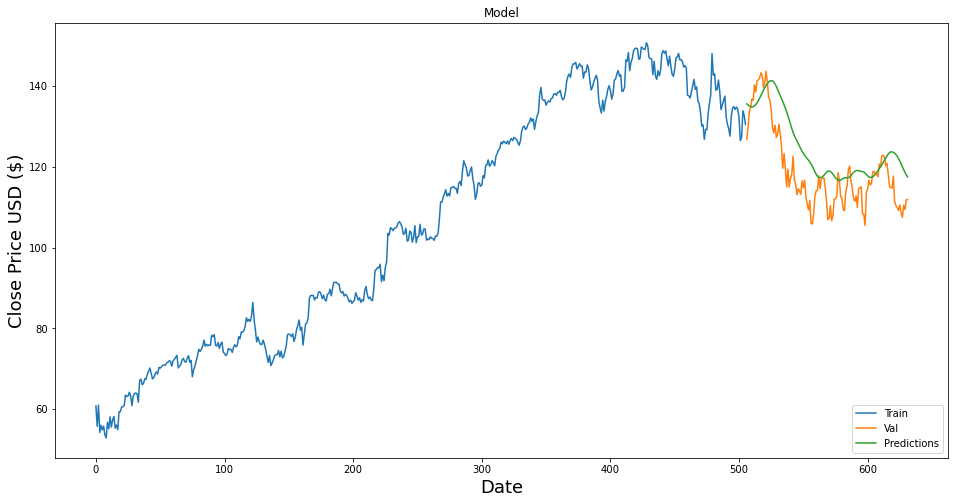

In [19]:
# Plot the data
import matplotlib.pyplot as plt

train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Epoch 1/50
14/14 [==============================] - 14s 101ms/step - loss: 0.1114
Epoch 2/50
14/14 [==============================] - 1s 91ms/step - loss: 0.0263
Epoch 3/50
14/14 [==============================] - 1s 93ms/step - loss: 0.0129
Epoch 4/50
14/14 [==============================] - 1s 96ms/step - loss: 0.0087
Epoch 5/50
14/14 [==============================] - 1s 93ms/step - loss: 0.0057
Epoch 6/50
14/14 [==============================] - 1s 97ms/step - loss: 0.0066
Epoch 7/50
14/14 [==============================] - 1s 90ms/step - loss: 0.0056
Epoch 8/50
14/14 [==============================] - 1s 82ms/step - loss: 0.0058
Epoch 9/50
14/14 [==============================] - 1s 82ms/step - loss: 0.0053
Epoch 10/50
14/14 [==============================] - 1s 82ms/step - loss: 0.0056
Epoch 11/50
14/14 [==============================] - 1s 93ms/step - loss: 0.0064
Epoch 12/50
14/14 [==============================] - 1s 86ms/step - loss: 0.0053
Epoch 13/50
14/14 [================

C:\Users\Dell\AppData\Local\Temp\ipykernel_5180\2980604579.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


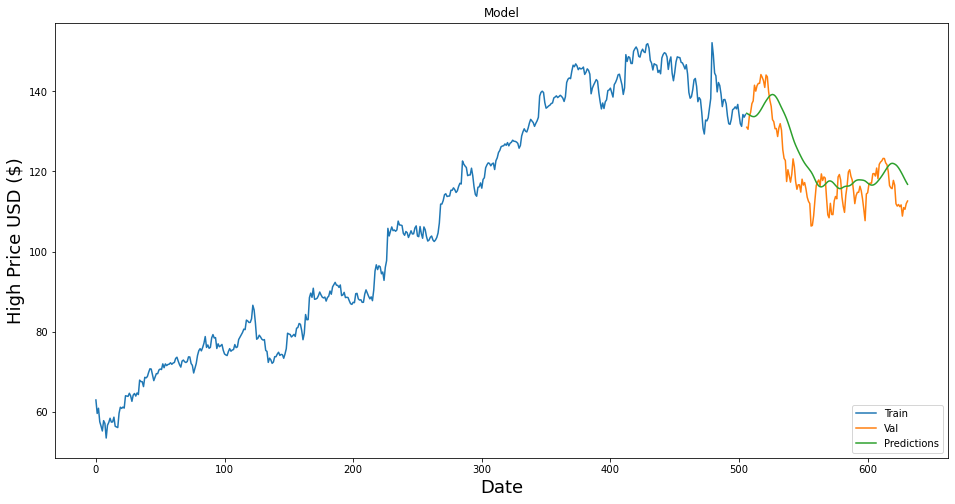

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load the dataset
df = pd.read_csv('stock_prices.csv')

# Data preprocessing
data = df.filter(['High']).values
train_data_len = int(np.ceil(len(data) * .8)) # Use 80% of the data as training data

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Create the training data set
train_data = scaled_data[0:train_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Create the testing data set
test_data = scaled_data[train_data_len - 60: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len : , : ]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

# Reshape the data to fit the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

# Plot the data
import matplotlib.pyplot as plt

train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.plot(train['High'])
plt.plot(valid[['High', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


Epoch 1/50
14/14 [==============================] - 18s 98ms/step - loss: 0.1155
Epoch 2/50
14/14 [==============================] - 1s 100ms/step - loss: 0.0186
Epoch 3/50
14/14 [==============================] - 1s 87ms/step - loss: 0.0098
Epoch 4/50
14/14 [==============================] - 1s 85ms/step - loss: 0.0071
Epoch 5/50
14/14 [==============================] - 1s 87ms/step - loss: 0.0064
Epoch 6/50
14/14 [==============================] - 1s 83ms/step - loss: 0.0058
Epoch 7/50
14/14 [==============================] - 1s 104ms/step - loss: 0.0059
Epoch 8/50
14/14 [==============================] - 1s 98ms/step - loss: 0.0057
Epoch 9/50
14/14 [==============================] - 1s 84ms/step - loss: 0.0048
Epoch 10/50
14/14 [==============================] - 1s 83ms/step - loss: 0.0053
Epoch 11/50
14/14 [==============================] - 1s 108ms/step - loss: 0.0056
Epoch 12/50
14/14 [==============================] - 1s 91ms/step - loss: 0.0052
Epoch 13/50
14/14 [==============

C:\Users\Dell\AppData\Local\Temp\ipykernel_5180\2606251209.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


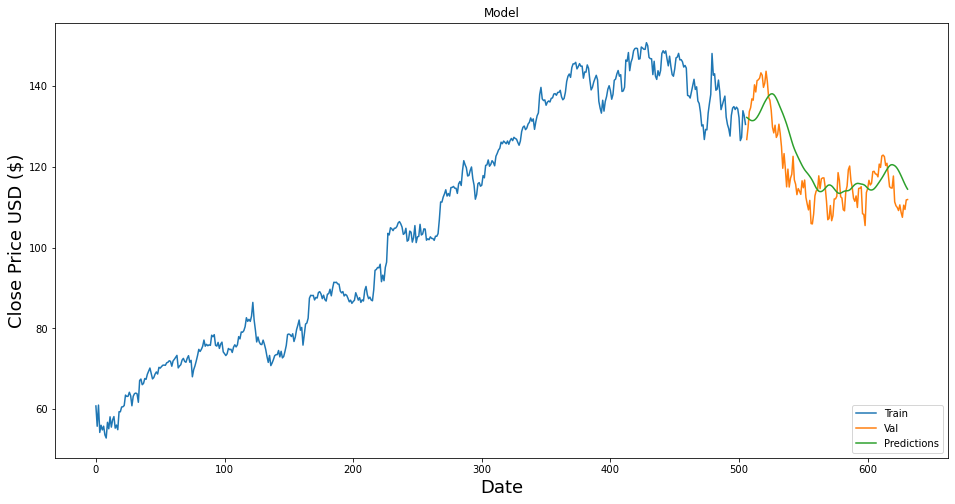

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load the dataset
df = pd.read_csv('stock_prices.csv')

# Data preprocessing
data = df.filter(['Close']).values
train_data_len = int(np.ceil(len(data) * .8)) # Use 80% of the data as training data

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Create the training data set
train_data = scaled_data[0:train_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Create the testing data set
test_data = scaled_data[train_data_len - 60: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len : , : ]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

# Reshape the data to fit the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

# Plot the data
import matplotlib.pyplot as plt

train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
